<a href="https://colab.research.google.com/github/hamednasr/Computer-Vision-with-Python/blob/main/body_move_detection_for_game(mediapipe_abdomen)_15fps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
import mediapipe as mp
from matplotlib import pyplot as plt
from IPython import display
display.set_matplotlib_formats('svg')
import cv2
import os
import time
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

C:\Users\david\AppData\Local\Temp/ipykernel_9528/3869536394.py:6: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


In [ ]:
mp_holistic = mp.solutions.holistic
mp_drawing = mp.solutions.drawing_utils

In [ ]:
def mediapipe_detection(image,model):
    results = model.process(image)
    return image, results

In [ ]:
# 11: left_shoulder
# 12: right_shoulder
# 23: left_hip
# 24: right_hip
abdomen_connections = ((11,12),(23,24),(11,23),(12,24))

In [ ]:
def draw_abdomen_landmarks(img,results):

    mp_drawing.draw_landmarks(img, 
                            results.pose_landmarks,
                            abdomen_connections,
                            landmark_drawing_spec=mp_drawing.DrawingSpec(color=(0, 0, 255), thickness=1, circle_radius=0),
                            connection_drawing_spec=mp_drawing.DrawingSpec(color=(0, 255, 0), thickness=2, circle_radius=2))
  

In [ ]:
cap = cv2.VideoCapture(0)

#initiate holistic model:
with mp_holistic.Holistic(min_detection_confidence=0.5,min_tracking_confidence=0.5) as holistic:
    
    while cap.isOpened():
        ret, frame = cap.read()

        frame, results = mediapipe_detection(frame,holistic)

        draw_abdomen_landmarks(frame,results)
        
        cv2.imshow('Webcam Feed', frame)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()

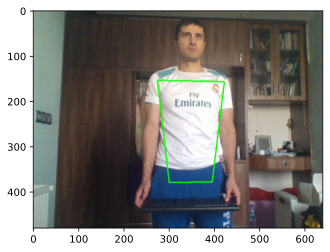

In [ ]:
img = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [ ]:
type(results.pose_landmarks)

mediapipe.framework.formats.landmark_pb2.NormalizedLandmarkList

In [ ]:
len(results.pose_landmarks.landmark)

33

In [ ]:
results.pose_landmarks

landmark {
  x: 0.5977007150650024
  y: -0.06079847365617752
  z: -1.1836155652999878
  visibility: 0.992580235004425
}
landmark {
  x: 0.6428635716438293
  y: -0.17244094610214233
  z: -1.2200076580047607
  visibility: 0.9848784804344177
}
landmark {
  x: 0.6684978604316711
  y: -0.1701737493276596
  z: -1.2198760509490967
  visibility: 0.9855934977531433
}
landmark {
  x: 0.6906297206878662
  y: -0.1662077158689499
  z: -1.2205009460449219
  visibility: 0.9883487820625305
}
landmark {
  x: 0.5648593902587891
  y: -0.1742817759513855
  z: -1.1754392385482788
  visibility: 0.9862890243530273
}
landmark {
  x: 0.5426031947135925
  y: -0.1762213408946991
  z: -1.1752169132232666
  visibility: 0.9834962487220764
}
landmark {
  x: 0.5192886590957642
  y: -0.18152186274528503
  z: -1.175356149673462
  visibility: 0.982496440410614
}
landmark {
  x: 0.7242156267166138
  y: -0.16524328291416168
  z: -1.0776615142822266
  visibility: 0.9896260499954224
}
landmark {
  x: 0.5017393827438354
  y:

In [ ]:
results.pose_landmarks.landmark[11], results.pose_landmarks.landmark[12]

In [ ]:
results.pose_landmarks.landmark[23], results.pose_landmarks.landmark[24]

(x: 0.6922551393508911
 y: 0.9057227373123169
 z: -0.09249164164066315
 visibility: 0.8787261843681335,
 x: 0.4225008487701416
 y: 0.8737083673477173
 z: 0.09520088136196136
 visibility: 0.8516271114349365)

In [ ]:
def abdomen_keypoints(results):
    if results.pose_landmarks:
        abdomen=[]
        for i in [11,12,23,24]:
            abdomen.append(results.pose_landmarks.landmark[i])
        keypoints = np.array([[r.x, r.y, r.z, r.visibility] for r in abdomen]).flatten()
    else:
        keypoints = np.zeros(4*4)
    
    return keypoints

# data record:

## jump:

In [ ]:
data_path = 'bodymove_data_abd_15fps'
no_videos = 100
sequences_length = 15

In [ ]:
for video in range(no_videos):
    try:
        os.makedirs(os.path.join(data_path,'jump',str(video)))  
    except:
        pass   

In [ ]:
cap = cv2.VideoCapture(0)

with mp_holistic.Holistic(min_detection_confidence=0.4,min_tracking_confidence=0.4) as holistic:

    for video in range(no_videos):

        ret, frame = cap.read()
        cv2.putText(frame,'COLLECTION START for JUMP',(100,200),
                    cv2.FONT_HERSHEY_COMPLEX,1,(0,0,255),4,cv2.LINE_AA)
        cv2.putText(frame,f'collecting frames for jump video numer {video}',(15,12),
                    cv2.FONT_HERSHEY_COMPLEX,.5,(0,255,0),1,cv2.LINE_AA)
        cv2.imshow('Webcam Feed', frame)
        cv2.waitKey(2000)

        for frame_num in range(sequences_length):            
            ret, frame = cap.read()

            image, results = mediapipe_detection(frame,holistic)

            draw_abdomen_landmarks(image,results)        

            keypoints = abdomen_keypoints(results)
#             print(keypoints)

            cv2.putText(image,f'collecting frames for jump video numer {video}',(15,12),
            cv2.FONT_HERSHEY_COMPLEX,0.5,(0,255,0),1,cv2.LINE_AA)
            cv2.imshow('Webcam Feed', image)

            npy_path = os.path.join(data_path,'jump',str(video),str(frame_num))
            np.save(npy_path,keypoints)
            cv2.waitKey(1)

        if cv2.waitKey(500) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()

## crouch:

In [ ]:
data_path = 'bodymove_data_abd_15fps'
no_videos = 100
sequences_length = 15

In [ ]:
for video in range(no_videos):
    try:
        os.makedirs(os.path.join(data_path,'crouch',str(video)))  
    except:
        pass   

In [ ]:
cap = cv2.VideoCapture(0)

with mp_holistic.Holistic(min_detection_confidence=0.4,min_tracking_confidence=0.4) as holistic:

    for video in range(no_videos):

        ret, frame = cap.read()
        cv2.putText(frame,'COLLECTION START for CROUCH',(100,200),
                    cv2.FONT_HERSHEY_COMPLEX,1,(0,0,255),4,cv2.LINE_AA)
        cv2.putText(frame,f'collecting frames for crouch video numer {video}',(15,12),
                    cv2.FONT_HERSHEY_COMPLEX,.5,(0,255,0),1,cv2.LINE_AA)
        cv2.imshow('Webcam Feed', frame)
        cv2.waitKey(2000)

        for frame_num in range(sequences_length):            
            ret, frame = cap.read()

            image, results = mediapipe_detection(frame,holistic)

            draw_abdomen_landmarks(image,results)        

            keypoints = abdomen_keypoints(results)
#             print(keypoints)

            cv2.putText(image,f'collecting frames for crouch video numer {video}',(15,12),
            cv2.FONT_HERSHEY_COMPLEX,0.5,(0,255,0),1,cv2.LINE_AA)
            cv2.imshow('Webcam Feed', image)

            npy_path = os.path.join(data_path,'crouch',str(video),str(frame_num))
            np.save(npy_path,keypoints)
            cv2.waitKey(1)

        if cv2.waitKey(500) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()

## right:

In [ ]:
data_path = 'bodymove_data_abd_15fps'
no_videos = 100
sequences_length = 15

In [ ]:
for video in range(no_videos):
    try:
        os.makedirs(os.path.join(data_path,'right',str(video)))  
    except:
        pass   

In [ ]:
cap = cv2.VideoCapture(0)

with mp_holistic.Holistic(min_detection_confidence=0.4,min_tracking_confidence=0.4) as holistic:

    for video in range(no_videos):

        ret, frame = cap.read()
        cv2.putText(frame,'COLLECTION START for right',(100,200),
                    cv2.FONT_HERSHEY_COMPLEX,1,(0,0,255),4,cv2.LINE_AA)
        cv2.putText(frame,f'collecting frames for right video numer {video}',(15,12),
                    cv2.FONT_HERSHEY_COMPLEX,.5,(0,255,0),1,cv2.LINE_AA)
        cv2.imshow('Webcam Feed', frame)
        cv2.waitKey(2000)

        for frame_num in range(sequences_length):            
            ret, frame = cap.read()

            image, results = mediapipe_detection(frame,holistic)

            draw_abdomen_landmarks(image,results)        

            keypoints = abdomen_keypoints(results)
#             print(keypoints)

            cv2.putText(image,f'collecting frames for right video numer {video}',(15,12),
            cv2.FONT_HERSHEY_COMPLEX,0.5,(0,255,0),1,cv2.LINE_AA)
            cv2.imshow('Webcam Feed', image)

            npy_path = os.path.join(data_path,'right',str(video),str(frame_num))
            np.save(npy_path,keypoints)
            cv2.waitKey(1)

        if cv2.waitKey(500) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()

## left:

In [ ]:
data_path = 'bodymove_data_abd_15fps'
no_videos = 100
sequences_length = 15

In [ ]:
for video in range(no_videos):
    try:
        os.makedirs(os.path.join(data_path,'left',str(video)))  
    except:
        pass   

In [ ]:
cap = cv2.VideoCapture(0)

with mp_holistic.Holistic(min_detection_confidence=0.4,min_tracking_confidence=0.4) as holistic:

    for video in range(no_videos):

        ret, frame = cap.read()
        cv2.putText(frame,'COLLECTION START for left',(100,200),
                    cv2.FONT_HERSHEY_COMPLEX,1,(0,0,255),4,cv2.LINE_AA)
        cv2.putText(frame,f'collecting frames for left video numer {video}',(15,12),
                    cv2.FONT_HERSHEY_COMPLEX,.5,(0,255,0),1,cv2.LINE_AA)
        cv2.imshow('Webcam Feed', frame)
        cv2.waitKey(2000)

        for frame_num in range(sequences_length):            
            ret, frame = cap.read()

            image, results = mediapipe_detection(frame,holistic)

            draw_abdomen_landmarks(image,results)        

            keypoints = abdomen_keypoints(results)
#             print(keypoints)

            cv2.putText(image,f'collecting frames for left video numer {video}',(15,12),
            cv2.FONT_HERSHEY_COMPLEX,0.5,(0,255,0),1,cv2.LINE_AA)
            cv2.imshow('Webcam Feed', image)

            npy_path = os.path.join(data_path,'left',str(video),str(frame_num))
            np.save(npy_path,keypoints)
            cv2.waitKey(1)

        if cv2.waitKey(500) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()

# preprocess data, create labels and train, test split:

In [ ]:
data_path = 'bodymove_data_abd_15fps'
no_videos = 100
sequences_length = 15

actions = np.array(['jump','crouch','right','left'])
actions

array(['jump', 'crouch', 'right', 'left'], dtype='<U6')

In [ ]:
label_map = {label:num for num, label in enumerate(actions)}
label_map

{'jump': 0, 'crouch': 1, 'right': 2, 'left': 3}

In [ ]:
sequences = []
labels = []

for action in actions:
  for video in range(no_videos):
    window = []
    for frame_num in range(sequences_length):
      res = np.load(os.path.join(data_path,action,str(video),f'{frame_num}.npy'))
#       print(res)
      window.append(np.delete(res, [3,7,11,15]))
#       window.append(res)
      
    sequences.append(window)
    labels.append(label_map[action])

In [ ]:
print(np.array(window).shape)
print(np.array(sequences).shape)
print(np.array(labels).shape)

(15, 12)
(400, 15, 12)
(400,)


In [ ]:
X = np.array(sequences)
y = np.array(labels)

In [ ]:
X.shape

(400, 15, 12)

In [ ]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3,

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
X_train.shape, X_test.shape

((320, 15, 12), (80, 15, 12))

In [ ]:
X_train.shape, X_test.shape

((320, 15, 12), (80, 15, 12))

# create and train deep learning model:

## create DL model:

In [ ]:
tensorboard=tf.keras.callbacks.TensorBoard(log_dir='logs')

In [ ]:
model = tf.keras.models.Sequential([
                    tf.keras.layers.LSTM(128,activation='relu', return_sequences=True,input_shape=(15,12)),
#                     tf.keras.layers.LSTM(64,activation='relu', return_sequences=True),
                    tf.keras.layers.LSTM(64,activation='relu', return_sequences=False),
#                     tf.keras.layers.LSTM(64,activation='relu', return_sequences=False),
#                     tf.keras.layers.Dense(64,activation='relu'),
                    tf.keras.layers.Dense(32,activation='relu'),
                    tf.keras.layers.Dense(actions.shape[0],activation='softmax')
                    ])

In [ ]:
model.compile(optimizer = tf.keras.optimizers.Adam(), 
              loss = 'sparse_categorical_crossentropy', 
              metrics='accuracy' )

In [ ]:
model.build()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 15, 128)           72192     
                                                                 
 lstm_1 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dense_1 (Dense)             (None, 4)                 132       
                                                                 
Total params: 123,812
Trainable params: 123,812
Non-trainable params: 0
_________________________________________________________________


## train DL model:

In [ ]:
model.fit(X_train,y_train,epochs=150)

Epoch 1/150
10/10 [==============================] - 5s 37ms/step - loss: 1.3840 - accuracy: 0.3375
Epoch 2/150
10/10 [==============================] - 0s 32ms/step - loss: 1.3707 - accuracy: 0.3938
Epoch 3/150
10/10 [==============================] - 0s 32ms/step - loss: 1.3432 - accuracy: 0.3594
Epoch 4/150
10/10 [==============================] - 0s 27ms/step - loss: 1.2966 - accuracy: 0.3531
Epoch 5/150
10/10 [==============================] - 0s 24ms/step - loss: 1.1670 - accuracy: 0.4750
Epoch 6/150
10/10 [==============================] - 0s 27ms/step - loss: 0.9450 - accuracy: 0.6313
Epoch 7/150
10/10 [==============================] - 0s 29ms/step - loss: 1.0634 - accuracy: 0.5750
Epoch 8/150
10/10 [==============================] - 0s 33ms/step - loss: 1.0451 - accuracy: 0.6719
Epoch 9/150
10/10 [==============================] - 0s 27ms/step - loss: 0.9072 - accuracy: 0.6031
Epoch 10/150
10/10 [==============================] - 0s 29ms/step - loss: 0.6108 - accuracy: 0.8156

10/10 [==============================] - 0s 28ms/step - loss: 1.9822e-04 - accuracy: 1.0000
Epoch 81/150
10/10 [==============================] - 0s 32ms/step - loss: 1.8420e-04 - accuracy: 1.0000
Epoch 82/150
10/10 [==============================] - 0s 38ms/step - loss: 1.7536e-04 - accuracy: 1.0000
Epoch 83/150
10/10 [==============================] - 0s 28ms/step - loss: 1.6795e-04 - accuracy: 1.0000
Epoch 84/150
10/10 [==============================] - 0s 26ms/step - loss: 1.6146e-04 - accuracy: 1.0000
Epoch 85/150
10/10 [==============================] - 0s 27ms/step - loss: 1.5579e-04 - accuracy: 1.0000
Epoch 86/150
10/10 [==============================] - 0s 31ms/step - loss: 1.5005e-04 - accuracy: 1.0000
Epoch 87/150
10/10 [==============================] - 0s 30ms/step - loss: 1.4041e-04 - accuracy: 1.0000
Epoch 88/150
10/10 [==============================] - 0s 33ms/step - loss: 1.3419e-04 - accuracy: 1.0000
Epoch 89/150
10/10 [==============================] - 0s 32ms/step -

KeyboardInterrupt: 

In [ ]:
model.evaluate(X_test,y_test)

3/3 [==============================] - 0s 11ms/step - loss: 0.0469 - accuracy: 0.9875


[0.04691658169031143, 0.987500011920929]

In [ ]:
y_pred = np.argmax(model.predict(X_test),axis=1)
y_pred

array([3, 1, 1, 1, 0, 1, 1, 2, 0, 1, 3, 1, 3, 0, 3, 3, 2, 3, 0, 2, 3, 3,
       0, 2, 1, 0, 2, 1, 0, 2, 0, 0, 2, 0, 1, 0, 3, 2, 1, 2, 0, 0, 2, 0,
       2, 0, 1, 2, 1, 2, 1, 2, 2, 1, 2, 0, 3, 1, 3, 2, 1, 0, 0, 2, 0, 0,
       1, 3, 1, 0, 3, 0, 3, 3, 2, 1, 2, 2, 3, 0], dtype=int64)

In [ ]:
y_test

array([3, 1, 1, 1, 0, 1, 1, 2, 0, 1, 3, 1, 3, 0, 3, 3, 2, 3, 0, 2, 3, 3,
       0, 2, 1, 0, 2, 1, 0, 2, 0, 0, 2, 0, 1, 0, 3, 2, 1, 2, 0, 0, 2, 0,
       2, 0, 1, 2, 1, 2, 1, 2, 2, 1, 2, 0, 3, 1, 3, 2, 1, 0, 0, 2, 0, 0,
       1, 3, 1, 0, 3, 0, 3, 3, 0, 1, 2, 2, 3, 0])

In [ ]:
model.save('gameaction_mp_abd_15fps.h5')

In [ ]:
model.load_weights('gameaction_mp_abd_15fps.h5')  

## evaluate DL model:

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[23,  0,  1,  0],
       [ 0, 20,  0,  0],
       [ 0,  0, 20,  0],
       [ 0,  0,  0, 16]], dtype=int64)

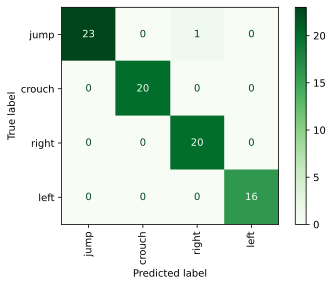

In [ ]:
disp = ConfusionMatrixDisplay(cm , display_labels= actions)

disp.plot(cmap='Greens' , xticks_rotation='vertical');

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        24
           1       1.00      1.00      1.00        20
           2       0.95      1.00      0.98        20
           3       1.00      1.00      1.00        16

    accuracy                           0.99        80
   macro avg       0.99      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80



# test a video sample:

In [ ]:
no_videos = 10
sequences_length = 15

In [ ]:
cap = cv2.VideoCapture(0)

with mp_holistic.Holistic(min_detection_confidence=0.4,min_tracking_confidence=0.4) as holistic:
    
    videos=[]
    for video in range(no_videos):
        
        window = []
        for frame_num in range(sequences_length):

            ret, frame = cap.read()

            image, results = mediapipe_detection(frame,holistic)

            draw_abdomen_landmarks(image,results)        

            keypoints = abdomen_keypoints(results)
#             print(keypoints)
            if frame_num==0:
                cv2.putText(image,'COLLECTION START',(150,200),
                            cv2.FONT_HERSHEY_COMPLEX,1,(0,0,255),4,cv2.LINE_AA)
                cv2.putText(image,f'collecting frames for left_jump video numer {video}',(15,12),
                            cv2.FONT_HERSHEY_COMPLEX,.5,(0,255,0),1,cv2.LINE_AA)
                cv2.imshow('Webcam Feed', image)
                cv2.waitKey(2000)

            else:
                cv2.putText(image,f'collecting frames for left_jump video numer {video}',(15,12),
                cv2.FONT_HERSHEY_COMPLEX,0.5,(0,255,0),1,cv2.LINE_AA)
                cv2.waitKey(130)
                cv2.imshow('Webcam Feed', image)

            window.append(keypoints)
        
        videos.append(window)
        if cv2.waitKey(20) & 0xFF == ord('q'):
            break
    
    inputv = np.array(videos)
    print(inputv.shape)
    pred = model.predict(inputv)
    print(pred)
    action = actions[np.argmax(pred,axis=1)]
    print(action)

    if np.max(pred)> threshold:

        ret, frame = cap.read()
        cv2.rectangle(frame,(0,0),(250,50),(245,117,16),-1)
        cv2.putText(frame, f'{action[0]}:{np.max(pred)}',
                          (3,30),cv2.FONT_HERSHEY_SIMPLEX,1.5,
                          (255,255,255),2,cv2.LINE_AA)
        cv2.imshow('Webcam Feed', frame)
        cv2.waitKey(2000)

#     if cv2.waitKey(10) & 0xFF == ord('q'):
#         break

cap.release()
cv2.destroyAllWindows()

(10, 10, 8)
[[1.57290851e-04 2.25490723e-02 2.21158828e-07 9.77293432e-01]
 [9.39777028e-03 4.03027778e-04 9.90121663e-01 7.75373410e-05]
 [9.10322607e-01 1.41660338e-02 2.50254222e-03 7.30087981e-02]
 [1.98862189e-03 1.84970908e-02 1.33860681e-06 9.79512990e-01]
 [2.49292459e-02 5.49245044e-04 9.74332452e-01 1.89031707e-04]
 [7.20424068e-05 9.96906340e-01 1.02988044e-04 2.91865971e-03]
 [1.05848379e-07 9.99958277e-01 1.18311918e-05 2.98451941e-05]
 [1.63568631e-02 9.21461046e-01 2.66733542e-02 3.55087034e-02]
 [2.17986684e-02 9.05931555e-03 9.68072176e-01 1.06985949e-03]
 [8.50328419e-04 7.44025130e-03 9.91298735e-01 4.10679320e-04]]
['left_jump' 'right_jump' 'jump' 'left_jump' 'right_jump' 'crouch'
 'crouch' 'crouch' 'right_jump' 'right_jump']


In [ ]:
L, R, J, L, R, C, C, J, R, R,

In [ ]:
threshold = 0.3

cap = cv2.VideoCapture(0)

with mp_holistic.Holistic(min_detection_confidence=0.4,min_tracking_confidence=0.4) as holistic:

    while cap.isOpened():
        
        ret, frame = cap.read()
        
        cv2.putText(frame,'Recording in 2 Seconds...',(20,30),
                    cv2.FONT_HERSHEY_COMPLEX,1,(0,0,255),4,cv2.LINE_AA)
        cv2.imshow('Webcam Feed', frame)
        cv2.waitKey(2000)
        
        window = []
        
        for frame_num in range(sequences_length):

            ret, frame = cap.read()

            cv2.putText(frame,'collecting frames',(20,30),
            cv2.FONT_HERSHEY_COMPLEX,1,(0,255,0),1,cv2.LINE_AA)
            cv2.imshow('Webcam Feed', frame)
                        
            image, results = mediapipe_detection(frame,holistic)
            draw_abdomen_landmarks(image,results)        
            keypoints = abdomen_keypoints(results)
            window.append(keypoints)
            cv2.waitKey(10)

        inputv = np.expand_dims(np.array(window),axis=0)
        print(inputv.shape)
        pred = model.predict(inputv)
        print(pred)
        action = actions[np.argmax(pred,axis=1)]
        print(action)

        if np.max(pred)> threshold:
    
            ret, frame = cap.read()
            cv2.rectangle(frame,(0,0),(250,50),(245,117,16),-1)
            cv2.putText(frame, f'{action[0]}:{np.max(pred)}',
                              (3,30),cv2.FONT_HERSHEY_SIMPLEX,1.5,
                              (255,255,255),2,cv2.LINE_AA)
            cv2.imshow('Webcam Feed', frame)
            cv2.waitKey(2000)
        
        if cv2.waitKey(300) & 0xFF == ord('q'):
            break

    
cap.release()
cv2.destroyAllWindows()

(1, 10, 8)
[[0.93715674 0.00121716 0.0521859  0.00944015]]
['jump']
(1, 10, 8)
[[4.4565618e-02 3.8835825e-04 9.5445013e-01 5.9585297e-04]]
['right_jump']
(1, 10, 8)
[[1.7882349e-01 3.2564722e-02 2.9607839e-04 7.8831571e-01]]
['left_jump']
(1, 10, 8)
[[1.00814894e-01 2.07286607e-03 4.02837795e-05 8.97071898e-01]]
['left_jump']
(1, 10, 8)
[[4.3239456e-02 2.3212238e-05 3.1833596e-07 9.5673692e-01]]
['left_jump']
(1, 10, 8)
[[9.9993002e-01 7.7448259e-10 3.6809088e-05 3.3127122e-05]]
['jump']
(1, 10, 8)
[[9.9966240e-01 1.3583649e-08 2.3553769e-04 1.0198485e-04]]
['jump']
(1, 10, 8)
[[9.9668616e-01 2.9634506e-08 3.2591904e-03 5.4632954e-05]]
['jump']
(1, 10, 8)
[[4.2861000e-01 4.3187250e-04 5.6670344e-01 4.2547751e-03]]
['right_jump']
(1, 10, 8)
[[3.3543263e-05 3.3148167e-01 5.6699544e-01 1.0148936e-01]]
['right_jump']
(1, 10, 8)
[[0.19764034 0.00114946 0.797175   0.00403524]]
['right_jump']
(1, 10, 8)
[[9.0660387e-01 6.1183215e-05 9.1330625e-02 2.0043552e-03]]
['jump']
(1, 1, 8)
[[0.2829253

# real time detection:

In [ ]:
sequence = []
sentence = []
threshold = 0.8

cap = cv2.VideoCapture(0)

with mp_holistic.Holistic(min_detection_confidence=0.4,min_tracking_confidence=0.4) as holistic:

    while cap.isOpened():

        ret, frame = cap.read()

        image, results = mediapipe_detection(frame,holistic)

        draw_abdomen_landmarks(image,results)        

        keypoints = abdomen_keypoints(results)
        print(keypoints)
        sequence.append(keypoints) 
        sequence = sequence[-10:]
        
        if len(sequence)==10:
            pred = model.predict(np.expand_dims(sequence,axis=0))
            action = actions[np.argmax(pred)]

            if np.max(pred)> threshold: 
                cv2.rectangle(image,(0,0),(200,50),(245,117,16),-1)
                cv2.putText(image, action,
                          (3,30),cv2.FONT_HERSHEY_SIMPLEX,1.5,
                          (255,255,255),2,cv2.LINE_AA)
            else:
                cv2.rectangle(image,(0,0),(200,50),(245,117,16),-1)
                cv2.putText(image, 'run',
                          (3,30),cv2.FONT_HERSHEY_SIMPLEX,1.5,
                          (255,255,255),2,cv2.LINE_AA)

        cv2.imshow('Webcam Feed', image)

        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()

[0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0.]
